In [854]:
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [855]:
pitching_path = 'baseball_pitching/data/'
hitting_path = 'baseball_hitting/data/'

# Data Exploration, Merging data

In [856]:
poi = pd.read_csv(pitching_path + 'poi/poi_metrics.csv')

In [857]:
metadata = pd.read_csv(pitching_path + 'metadata.csv')

In [858]:
poi.columns

Index(['session_pitch', 'session', 'p_throws', 'pitch_type', 'pitch_speed_mph',
       'max_shoulder_internal_rotational_velo', 'max_elbow_extension_velo',
       'max_torso_rotational_velo', 'max_rotation_hip_shoulder_separation',
       'max_elbow_flexion', 'max_shoulder_external_rotation',
       'elbow_flexion_fp', 'elbow_pronation_fp',
       'rotation_hip_shoulder_separation_fp',
       'shoulder_horizontal_abduction_fp', 'shoulder_abduction_fp',
       'shoulder_external_rotation_fp', 'lead_knee_extension_angular_velo_fp',
       'lead_knee_extension_angular_velo_br',
       'lead_knee_extension_angular_velo_max', 'torso_anterior_tilt_fp',
       'torso_lateral_tilt_fp', 'torso_rotation_fp', 'pelvis_anterior_tilt_fp',
       'pelvis_lateral_tilt_fp', 'pelvis_rotation_fp', 'max_cog_velo_x',
       'torso_rotation_min', 'max_pelvis_rotational_velo',
       'glove_shoulder_horizontal_abduction_fp', 'glove_shoulder_abduction_fp',
       'glove_shoulder_external_rotation_fp', 'glove_

In [859]:
metadata.columns

Index(['user', 'session', 'session_pitch', 'session_mass_kg',
       'session_height_m', 'age_yrs', 'playing_level', 'pitch_speed_mph',
       'filename_new', 'modelname_new'],
      dtype='object')

In [860]:
metadata.drop(columns=['user', 'session', 'pitch_speed_mph', 'filename_new', 'modelname_new'], axis=1, inplace=True)

In [861]:
poi_metadata = poi.merge(metadata, on='session_pitch', how='left')
poi_metadata

,session_pitch,session,p_throws,pitch_type,pitch_speed_mph,max_shoulder_internal_rotational_velo,max_elbow_extension_velo,max_torso_rotational_velo,max_rotation_hip_shoulder_separation,max_elbow_flexion,...,lead_grf_y_max,lead_grf_z_max,lead_grf_mag_max,lead_grf_angle_at_max,peak_rfd_rear,peak_rfd_lead,session_mass_kg,session_height_m,age_yrs,playing_level
0,1031_2,1031,R,FF,90.4,4533.2480,2445.8177,958.0878,32.3152,109.9971,...,270.7849,2484.8747,2782.9580,63.3501,11.6564,170.4620,110.6784,1.9304,21.40,college
1,1031_3,1031,R,FF,90.4,4571.1735,2389.5438,969.5766,32.5547,109.1065,...,252.1999,2690.7521,3038.8913,62.3087,9.5715,183.6636,110.6784,1.9304,21.40,college
2,1097_1,1097,R,FF,77.6,4165.3055,2426.3029,1090.2269,33.1477,123.4752,...,245.4411,1767.4604,2010.5341,61.5594,4.4432,52.9333,101.1528,1.9304,19.41,college
3,1097_2,1097,R,FF,77.0,3832.1715,2424.0493,1105.2275,27.9286,124.6578,...,280.5177,1715.1864,1864.0488,66.6789,6.4897,54.3727,101.1528,1.9304,19.41,college
4,1097_3,1097,R,FF,76.1,3970.7971,2497.6253,1110.4850,28.9909,124.8308,...,337.4227,2120.4510,2283.1749,65.9014,7.2019,106.2719,101.1528,1.9304,19.41,college
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,3252_1,3252,R,FF,80.8,4494.0446,2759.7142,1129.4168,42.9000,123.5448,...,141.5886,1685.4288,1891.2377,63.0494,6307.8100,72742.9029,88.4520,1.8796,20.38,college
407,3252_2,3252,R,FF,80.8,4550.4618,2742.8536,1129.4417,43.5008,123.5490,...,104.1382,1708.8564,1932.4776,61.7749,7850.2644,77906.1103,88.4520,1.8796,20.38,college
408,3252_3,3252,R,FF,80.8,4580.0385,2796.3719,1133.8676,43.7838,125.6560,...,86.2704,1647.5457,1858.1106,62.8667,16303.1697,77777.3331,88.4520,1.8796,20.38,college
409,3252_4,3252,R,FF,83.3,4638.4414,2815.9331,1119.5235,43.0352,127.5534,...,117.9198,1658.6645,1863.5780,63.3718,11758.9779,77382.0300,88.4520,1.8796,20.38,college


In [862]:
poi_metadata.p_throws = np.where(poi_metadata.p_throws == 'R', 1, 0)

In [863]:
level_encoding = {
    'high_school': 1,
    'college': 2,
    'independent': 3,
    'milb': 4
}
poi_metadata['playing_level'] = poi_metadata['playing_level'].replace(level_encoding)

In [864]:
poi_metadata.drop('pitch_type', axis=1, inplace=True)

In [865]:
poi_metadata.drop('session', axis=1, inplace=True)

<Axes: >

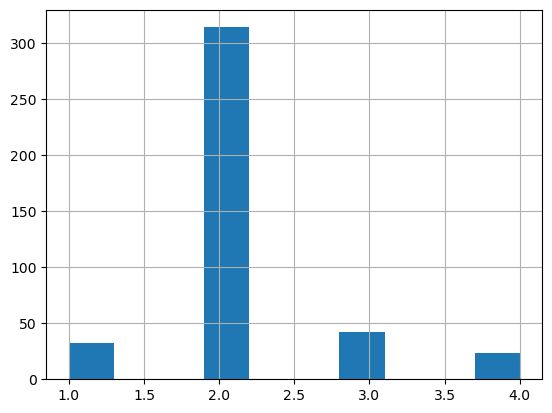

In [866]:
poi_metadata.playing_level.hist()

<Axes: >

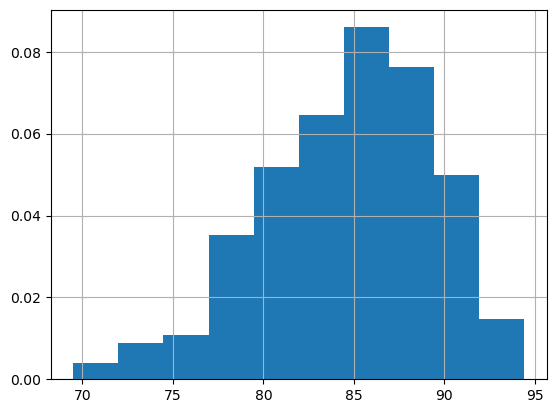

In [867]:
poi_metadata.pitch_speed_mph.hist(density=True)    

In [868]:
print(np.mean(poi_metadata.pitch_speed_mph[poi_metadata.playing_level==1]),np.mean(poi_metadata.pitch_speed_mph[poi_metadata.playing_level==2]),np.mean(poi_metadata.pitch_speed_mph[poi_metadata.playing_level==3]),np.mean(poi_metadata.pitch_speed_mph[poi_metadata.playing_level==4]))

79.515625 84.73375796178344 85.94285714285715 89.24782608695651


In [869]:
pitching_full_sig_path = pitching_path + 'full_sig/'
energy_flow = pd.read_csv(pitching_full_sig_path + 'energy_flow.csv')
force_plate = pd.read_csv(pitching_full_sig_path + 'force_plate.csv')
forces_moments = pd.read_csv(pitching_full_sig_path + 'forces_moments.csv')
joint_angles = pd.read_csv(pitching_full_sig_path + 'joint_angles.csv')
joint_velos = pd.read_csv(pitching_full_sig_path + 'joint_velos.csv')
landmarks = pd.read_csv(pitching_full_sig_path + 'landmarks.csv')

In [870]:
energy_flow.columns

Index(['session_pitch', 'time', 'rear_knee_energy_transfer_stp',
       'rear_knee_energy_transfer_jfp', 'rear_knee_energy_generated',
       'lead_knee_energy_transfer_stp', 'lead_knee_energy_transfer_jfp',
       'lead_knee_energy_generated', 'rear_hip_energy_transfer_stp',
       'rear_hip_energy_transfer_jfp', 'rear_hip_energy_generated',
       'lead_hip_energy_transfer_stp', 'lead_hip_energy_transfer_jfp',
       'lead_hip_energy_generated', 'elbow_energy_transfer_stp',
       'elbow_energy_transfer_jfp', 'elbow_energy_generated',
       'glove_elbow_energy_transfer_stp', 'glove_elbow_energy_transfer_jfp',
       'glove_elbow_energy_generated', 'shoulder_energy_transfer_stp',
       'shoulder_energy_transfer_jfp', 'shoulder_energy_generated',
       'glove_shoulder_energy_transfer_stp',
       'glove_shoulder_energy_transfer_jfp', 'glove_shoulder_energy_generated',
       'glove_upper_arm_dist_seg_pwr', 'glove_upper_arm_prox_seg_pwr',
       'glove_forearm_dist_seg_pwr', 'glove_f

In [871]:
force_plate.columns

Index(['session_pitch', 'time', 'rear_force_x', 'rear_force_y', 'rear_force_z',
       'lead_force_x', 'lead_force_y', 'lead_force_z', 'pkh_time',
       'fp_10_time', 'fp_100_time', 'MER_time', 'BR_time', 'MIR_time'],
      dtype='object')

In [872]:
forces_moments.columns

Index(['session_pitch', 'time', 'rear_ankle_moment_x', 'rear_ankle_moment_y',
       'rear_ankle_moment_z', 'elbow_moment_x', 'elbow_moment_y',
       'elbow_moment_z', 'rear_hip_rear_thigh_moment_x',
       'rear_hip_rear_thigh_moment_y',
       ...
       'glove_shoulder_thorax_force_z', 'glove_wrist_force_x',
       'glove_wrist_force_y', 'glove_wrist_force_z', 'pkh_time', 'fp_10_time',
       'fp_100_time', 'MER_time', 'BR_time', 'MIR_time'],
      dtype='object', length=104)

In [873]:
joint_angles.columns

Index(['session_pitch', 'time', 'rear_ankle_angle_x', 'rear_ankle_angle_y',
       'rear_ankle_angle_z', 'elbow_angle_x', 'elbow_angle_y', 'elbow_angle_z',
       'rear_hip_angle_x', 'rear_hip_angle_y', 'rear_hip_angle_z',
       'rear_knee_angle_x', 'rear_knee_angle_y', 'rear_knee_angle_z',
       'shoulder_angle_x', 'shoulder_angle_y', 'shoulder_angle_z',
       'wrist_angle_x', 'wrist_angle_y', 'wrist_angle_z', 'pelvis_angle_x',
       'pelvis_angle_y', 'pelvis_angle_z', 'lead_ankle_angle_x',
       'lead_ankle_angle_y', 'lead_ankle_angle_z', 'glove_elbow_angle_x',
       'glove_elbow_angle_y', 'glove_elbow_angle_z', 'lead_hip_angle_x',
       'lead_hip_angle_y', 'lead_hip_angle_z', 'lead_knee_angle_x',
       'lead_knee_angle_y', 'lead_knee_angle_z', 'glove_shoulder_angle_x',
       'glove_shoulder_angle_y', 'glove_shoulder_angle_z',
       'glove_wrist_angle_x', 'glove_wrist_angle_y', 'glove_wrist_angle_z',
       'torso_angle_x', 'torso_angle_y', 'torso_angle_z',
       'torso_pe

In [874]:
joint_velos.columns

Index(['session_pitch', 'time', 'elbow_velo_x', 'elbow_velo_y', 'elbow_velo_z',
       'rear_hip_velo_x', 'rear_hip_velo_y', 'rear_hip_velo_z',
       'rear_knee_velo_x', 'rear_knee_velo_y', 'rear_knee_velo_z',
       'shoulder_velo_x', 'shoulder_velo_y', 'shoulder_velo_z', 'wrist_velo_x',
       'wrist_velo_y', 'wrist_velo_z', 'pelvis_velo_x', 'pelvis_velo_y',
       'pelvis_velo_z', 'glove_elbow_velo_x', 'glove_elbow_velo_y',
       'glove_elbow_velo_z', 'lead_hip_velo_x', 'lead_hip_velo_y',
       'lead_hip_velo_z', 'lead_knee_velo_x', 'lead_knee_velo_y',
       'lead_knee_velo_z', 'glove_shoulder_velo_x', 'glove_shoulder_velo_y',
       'glove_shoulder_velo_z', 'glove_wrist_velo_x', 'glove_wrist_velo_y',
       'glove_wrist_velo_z', 'torso_velo_x', 'torso_velo_y', 'torso_velo_z',
       'torso_pelvis_velo_x', 'torso_pelvis_velo_y', 'torso_pelvis_velo_z',
       'pkh_time', 'fp_10_time', 'fp_100_time', 'MER_time', 'BR_time',
       'MIR_time'],
      dtype='object')

In [875]:
landmarks.columns

Index(['session_pitch', 'time', 'rear_ankle_jc_x', 'rear_ankle_jc_y',
       'rear_ankle_jc_z', 'rear_hip_x', 'rear_hip_y', 'rear_hip_z',
       'elbow_jc_x', 'elbow_jc_y', 'elbow_jc_z', 'hand_jc_x', 'hand_jc_y',
       'hand_jc_z', 'rear_knee_jc_x', 'rear_knee_jc_y', 'rear_knee_jc_z',
       'shoulder_jc_x', 'shoulder_jc_y', 'shoulder_jc_z', 'wrist_jc_x',
       'wrist_jc_y', 'wrist_jc_z', 'lead_ankle_jc_x', 'lead_ankle_jc_y',
       'lead_ankle_jc_z', 'lead_hip_x', 'lead_hip_y', 'lead_hip_z',
       'glove_elbow_jc_x', 'glove_elbow_jc_y', 'glove_elbow_jc_z',
       'glove_hand_jc_x', 'glove_hand_jc_y', 'glove_hand_jc_z',
       'lead_knee_jc_x', 'lead_knee_jc_y', 'lead_knee_jc_z',
       'glove_shoulder_jc_x', 'glove_shoulder_jc_y', 'glove_shoulder_jc_z',
       'glove_wrist_jc_x', 'glove_wrist_jc_y', 'glove_wrist_jc_z',
       'thorax_ap_x', 'thorax_ap_y', 'thorax_ap_z', 'thorax_dist_x',
       'thorax_dist_y', 'thorax_dist_z', 'thorax_prox_x', 'thorax_prox_y',
       'thorax_prox_z

In [876]:
print(len(poi_metadata),len(energy_flow),len(force_plate),len(forces_moments),len(joint_angles),len(joint_velos),len(landmarks))

411 247709 727824 247709 247709 247709 247709


In [877]:
columns = []
for col in force_plate.columns:
    if col in energy_flow.columns and col not in ['session_pitch','time']:
        columns.append(col)
# force_plate.drop(columns=columns, axis=1, inplace=True)
merged = energy_flow.merge(force_plate.drop(columns=columns, axis=1), on = ['session_pitch','time'], how='left')

In [878]:
columns = []
for col in forces_moments.columns:
    if col in merged.columns and col not in ['session_pitch','time']:
        columns.append(col)
# force_plate.drop(columns=columns, axis=1, inplace=True)
merged = merged.merge(forces_moments.drop(columns=columns, axis=1), on = ['session_pitch','time'], how='left')

In [879]:
columns = []
for col in joint_angles.columns:
    if col in merged.columns and col not in ['session_pitch','time']:
        columns.append(col)
# force_plate.drop(columns=columns, axis=1, inplace=True)
merged = merged.merge(joint_angles.drop(columns=columns, axis=1), on = ['session_pitch','time'], how='left')

In [880]:
columns = []
for col in joint_velos.columns:
    if col in merged.columns and col not in ['session_pitch','time']:
        columns.append(col)
# force_plate.drop(columns=columns, axis=1, inplace=True)
merged = merged.merge(joint_velos.drop(columns=columns, axis=1), on = ['session_pitch','time'], how='left')

In [881]:
columns = []
for col in landmarks.columns:
    if col in merged.columns and col not in ['session_pitch','time']:
        columns.append(col)
# force_plate.drop(columns=columns, axis=1, inplace=True)
merged = merged.merge(landmarks.drop(columns=columns, axis=1), on = ['session_pitch','time'], how='left')

In [882]:
merged

,session_pitch,time,rear_knee_energy_transfer_stp,rear_knee_energy_transfer_jfp,rear_knee_energy_generated,lead_knee_energy_transfer_stp,lead_knee_energy_transfer_jfp,lead_knee_energy_generated,rear_hip_energy_transfer_stp,rear_hip_energy_transfer_jfp,...,thorax_ap_z,thorax_dist_x,thorax_dist_y,thorax_dist_z,thorax_prox_x,thorax_prox_y,thorax_prox_z,centerofmass_x,centerofmass_y,centerofmass_z
0,1031_2,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.6123,0.1213,-0.1545,1.3509,0.1147,-0.1729,1.6184,0.1148,-0.1556,1.1440
1,1031_2,0.0028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.6124,0.1218,-0.1547,1.3510,0.1152,-0.1731,1.6184,0.1167,-0.1562,1.1458
2,1031_2,0.0056,45.3350,20.1973,-8.0818,17.7538,6.0121,44.9851,0.1649,19.1142,...,1.6125,0.1221,-0.1549,1.3511,0.1156,-0.1733,1.6184,0.1169,-0.1563,1.1459
3,1031_2,0.0083,38.2959,19.3669,-8.7513,14.0252,4.4715,34.3861,0.0000,18.4929,...,1.6126,0.1224,-0.1551,1.3512,0.1160,-0.1736,1.6185,0.1171,-0.1564,1.1459
4,1031_2,0.0111,31.5861,18.5402,-9.5193,10.4432,3.0432,24.3333,0.0000,17.8197,...,1.6127,0.1227,-0.1553,1.3512,0.1163,-0.1738,1.6186,0.1173,-0.1566,1.1460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247704,3252_5,1.7528,-65.5371,-174.4923,10.9729,-101.9002,25.9129,-321.7640,0.0000,-284.1946,...,1.2854,1.5113,-0.0011,1.1167,1.6018,0.1272,1.2994,1.4461,-0.0296,0.9630
247705,3252_5,1.7556,-57.7275,-163.6167,9.1722,-101.9734,26.6900,-320.3218,0.0000,-277.5526,...,1.2879,1.5129,0.0010,1.1187,1.6033,0.1291,1.3020,1.4480,-0.0290,0.9657
247706,3252_5,1.7583,-53.0746,-157.1646,8.0998,-102.0185,27.1232,-319.4924,0.0000,-273.6412,...,1.2901,1.5144,0.0030,1.1206,1.6048,0.1308,1.3044,1.4500,-0.0285,0.9682
247707,3252_5,1.7611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.2920,1.5159,0.0049,1.1222,1.6063,0.1323,1.3065,1.4520,-0.0279,0.9703


In [883]:
for col in merged.columns:
    if col in poi_metadata.columns:
        print(col)

session_pitch


In [884]:
all_merged = poi_metadata.merge(merged.drop(columns=columns, axis=1), on = 'session_pitch', how='left')

In [885]:
all_merged['order'] = all_merged.groupby('session_pitch').cumcount() + 1
all_merged.order

0           1
1           2
2           3
3           4
4           5
         ... 
247704    632
247705    633
247706    634
247707    635
247708    636
Name: order, Length: 247709, dtype: int64

In [886]:
poi_metadata[poi_metadata.isna().any(axis=1)]

,session_pitch,p_throws,pitch_speed_mph,max_shoulder_internal_rotational_velo,max_elbow_extension_velo,max_torso_rotational_velo,max_rotation_hip_shoulder_separation,max_elbow_flexion,max_shoulder_external_rotation,elbow_flexion_fp,...,lead_grf_y_max,lead_grf_z_max,lead_grf_mag_max,lead_grf_angle_at_max,peak_rfd_rear,peak_rfd_lead,session_mass_kg,session_height_m,age_yrs,playing_level
15,1370_1,1,87.8,4378.9195,2233.9898,1152.4505,28.4991,106.6919,156.3049,95.9804,...,NaN,NaN,NaN,NaN,NaN,NaN,104.3280,1.9050,23.43,3
191,2857_4,1,72.9,4815.1804,2386.8824,877.5712,40.6763,96.2136,165.2810,52.6094,...,NaN,NaN,NaN,NaN,NaN,NaN,69.4008,1.8542,18.85,2
247,2919_2,1,82.6,4924.3223,2775.5162,951.6221,28.8214,132.7934,182.2818,90.9193,...,NaN,NaN,NaN,NaN,NaN,NaN,84.8232,1.9050,18.80,2
248,2919_3,1,84.0,4812.6796,2720.4570,985.4787,29.6014,134.5015,184.0617,93.9795,...,NaN,NaN,NaN,NaN,NaN,NaN,84.8232,1.9050,18.80,2
249,2919_4,1,82.6,4847.2724,2766.5142,954.6934,28.7634,134.0515,183.6061,92.7248,...,NaN,NaN,NaN,NaN,NaN,NaN,84.8232,1.9050,18.80,2
250,2919_5,1,82.6,4991.7229,2821.7158,953.1706,28.0776,132.8751,184.1284,93.9730,...,NaN,NaN,NaN,NaN,NaN,NaN,84.8232,1.9050,18.80,2
251,2923_1,1,78.9,4250.3573,2077.3878,1062.1852,21.4589,101.8802,151.2197,91.0276,...,NaN,NaN,NaN,NaN,NaN,NaN,73.4832,1.7780,20.09,2
252,2923_2,1,76.4,4292.0506,2071.5214,1088.3251,22.0308,100.8572,152.0982,91.2621,...,NaN,NaN,NaN,NaN,NaN,NaN,73.4832,1.7780,20.09,2


In [887]:
poi_metadata.dropna(inplace=True)

# POI Metadata

Train-test split

In [888]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [889]:
poi_train, poi_test, mph_train, mph_test = train_test_split(poi_metadata.drop(columns=['pitch_speed_mph']), poi_metadata.pitch_speed_mph, test_size=0.2, random_state=42)
poi_train, poi_val, mph_train, mph_val = train_test_split(poi_train, mph_train, test_size=0.2, random_state=42)

In [890]:
poi_train = poi_train.reset_index().drop(columns='index', axis=1)
poi_val = poi_val.reset_index().drop(columns='index', axis=1)
mph_train = mph_train.reset_index().drop(columns='index', axis=1)
mph_val = mph_val.reset_index().drop(columns='index', axis=1)
poi_test = poi_test.reset_index().drop(columns='index', axis=1)
mph_test = mph_test.reset_index().drop(columns='index', axis=1)

In [891]:
x_train = poi_train.drop(columns=['session_pitch'])
x_val = poi_val.drop(columns=['session_pitch'])
linear_model = LinearRegression().fit(x_train,mph_train)
linear_model.score(x_val,mph_val)

0.6580810469227177

In [892]:
landmarks

,session_pitch,time,rear_ankle_jc_x,rear_ankle_jc_y,rear_ankle_jc_z,rear_hip_x,rear_hip_y,rear_hip_z,elbow_jc_x,elbow_jc_y,...,thorax_prox_z,centerofmass_x,centerofmass_y,centerofmass_z,pkh_time,fp_10_time,fp_100_time,MER_time,BR_time,MIR_time
0,1031_2,0.0000,0.0719,-0.1806,0.0622,-0.0345,-0.1740,0.9830,-0.1766,-0.2383,...,1.6184,0.1148,-0.1556,1.1440,0.625,1.1806,1.1917,1.3056,1.3389,1.3778
1,1031_2,0.0028,0.0720,-0.1806,0.0623,-0.0343,-0.1738,0.9832,-0.1764,-0.2382,...,1.6184,0.1167,-0.1562,1.1458,0.625,1.1806,1.1917,1.3056,1.3389,1.3778
2,1031_2,0.0056,0.0719,-0.1806,0.0624,-0.0342,-0.1736,0.9833,-0.1762,-0.2380,...,1.6184,0.1169,-0.1563,1.1459,0.625,1.1806,1.1917,1.3056,1.3389,1.3778
3,1031_2,0.0083,0.0719,-0.1806,0.0624,-0.0341,-0.1734,0.9835,-0.1762,-0.2378,...,1.6185,0.1171,-0.1564,1.1459,0.625,1.1806,1.1917,1.3056,1.3389,1.3778
4,1031_2,0.0111,0.0718,-0.1805,0.0624,-0.0341,-0.1732,0.9836,-0.1762,-0.2377,...,1.6186,0.1173,-0.1566,1.1460,0.625,1.1806,1.1917,1.3056,1.3389,1.3778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247704,3252_5,1.7528,0.7124,-0.4337,0.7062,1.4425,-0.2609,0.8528,1.4963,0.1718,...,1.2994,1.4461,-0.0296,0.9630,0.800,1.4139,1.4278,1.5500,1.5778,1.6139
247705,3252_5,1.7556,0.7193,-0.4447,0.7169,1.4456,-0.2594,0.8554,1.4979,0.1699,...,1.3020,1.4480,-0.0290,0.9657,0.800,1.4139,1.4278,1.5500,1.5778,1.6139
247706,3252_5,1.7583,0.7261,-0.4550,0.7268,1.4485,-0.2579,0.8577,1.4998,0.1686,...,1.3044,1.4500,-0.0285,0.9682,0.800,1.4139,1.4278,1.5500,1.5778,1.6139
247707,3252_5,1.7611,0.7325,-0.4643,0.7359,1.4514,-0.2565,0.8598,1.5018,0.1677,...,1.3065,1.4520,-0.0279,0.9703,0.800,1.4139,1.4278,1.5500,1.5778,1.6139


In [893]:
max_time_per_session = all_merged.groupby('session_pitch')['time'].max().reset_index()
idx = landmarks.groupby('session_pitch')['lead_knee_jc_z'].idxmax()
peak_leg_lift_time = landmarks.loc[idx, ['session_pitch', 'lead_knee_jc_z', 'time']].rename(columns={'time': 'peak_knee_time'}).reset_index(drop=True)
BR_FP_time = landmarks.groupby('session_pitch')[['BR_time', 'fp_10_time', 'fp_100_time']].max().reset_index()
timing_df = peak_leg_lift_time.merge(BR_FP_time, on='session_pitch', how='inner')
timing_df['peak_knee_to_BR_time'] = timing_df.BR_time - timing_df.peak_knee_time
timing_df['peak_knee_to_FS_time'] = timing_df.fp_10_time - timing_df.peak_knee_time
timing_df['peak_knee_to_FP_time'] = timing_df.fp_100_time - timing_df.peak_knee_time
timing_df['FS_to_BR_time'] = timing_df.BR_time - timing_df.fp_10_time
timing_df['FP_to_BR_time'] = timing_df.BR_time - timing_df.fp_100_time
timing_df = timing_df.merge(max_time_per_session, on='session_pitch', how='left').rename(columns={'time': 'total_time'})

timing_df

,session_pitch,lead_knee_jc_z,peak_knee_time,BR_time,fp_10_time,fp_100_time,peak_knee_to_BR_time,peak_knee_to_FS_time,peak_knee_to_FP_time,FS_to_BR_time,FP_to_BR_time,total_time
0,1031_2,1.1610,0.6250,1.3389,1.1806,1.1917,0.7139,0.5556,0.5667,0.1583,0.1472,1.5250
1,1031_3,1.1455,0.0917,0.8250,0.6639,0.6806,0.7333,0.5722,0.5889,0.1611,0.1444,1.0167
2,1097_1,1.2528,0.1056,1.0028,0.7722,0.8278,0.8972,0.6666,0.7222,0.2306,0.1750,1.1944
3,1097_2,1.3346,0.1722,1.0611,0.8528,0.8917,0.8889,0.6806,0.7195,0.2083,0.1694,1.2361
4,1097_3,1.3434,0.1472,1.0306,0.8361,0.8472,0.8834,0.6889,0.7000,0.1945,0.1834,1.2361
...,...,...,...,...,...,...,...,...,...,...,...,...
406,3252_1,1.1282,1.1250,1.9167,1.7556,1.7722,0.7917,0.6306,0.6472,0.1611,0.1445,2.0722
407,3252_2,1.1912,0.8583,1.6722,1.5111,1.5250,0.8139,0.6528,0.6667,0.1611,0.1472,1.8139
408,3252_3,1.1596,0.8944,1.6889,1.5306,1.5444,0.7945,0.6362,0.6500,0.1583,0.1445,1.8778
409,3252_4,1.1912,0.6250,1.4444,1.2861,1.3083,0.8194,0.6611,0.6833,0.1583,0.1361,1.6500


In [894]:
# Merge this information back into poi_metadata
poi_train_new = pd.merge(poi_train, timing_df.drop(columns=['BR_time', 'fp_10_time', 'fp_100_time', 'peak_knee_time'], axis=1), on='session_pitch', how='left')
poi_val_new = pd.merge(poi_val, timing_df.drop(columns=['BR_time', 'fp_10_time', 'fp_100_time', 'peak_knee_time'], axis=1), on='session_pitch', how='left')

In [895]:
poi_train_new.columns

Index(['session_pitch', 'p_throws', 'max_shoulder_internal_rotational_velo',
       'max_elbow_extension_velo', 'max_torso_rotational_velo',
       'max_rotation_hip_shoulder_separation', 'max_elbow_flexion',
       'max_shoulder_external_rotation', 'elbow_flexion_fp',
       'elbow_pronation_fp', 'rotation_hip_shoulder_separation_fp',
       'shoulder_horizontal_abduction_fp', 'shoulder_abduction_fp',
       'shoulder_external_rotation_fp', 'lead_knee_extension_angular_velo_fp',
       'lead_knee_extension_angular_velo_br',
       'lead_knee_extension_angular_velo_max', 'torso_anterior_tilt_fp',
       'torso_lateral_tilt_fp', 'torso_rotation_fp', 'pelvis_anterior_tilt_fp',
       'pelvis_lateral_tilt_fp', 'pelvis_rotation_fp', 'max_cog_velo_x',
       'torso_rotation_min', 'max_pelvis_rotational_velo',
       'glove_shoulder_horizontal_abduction_fp', 'glove_shoulder_abduction_fp',
       'glove_shoulder_external_rotation_fp', 'glove_shoulder_abduction_mer',
       'elbow_flexion_mer'

In [896]:
x_train = poi_train_new.drop(columns=['session_pitch'])
x_val = poi_val_new.drop(columns=['session_pitch'])
linear_model = LinearRegression().fit(x_train,mph_train)
linear_model.score(x_val,mph_val)

0.6846427607743057

In [897]:
x_train

,p_throws,max_shoulder_internal_rotational_velo,max_elbow_extension_velo,max_torso_rotational_velo,max_rotation_hip_shoulder_separation,max_elbow_flexion,max_shoulder_external_rotation,elbow_flexion_fp,elbow_pronation_fp,rotation_hip_shoulder_separation_fp,...,session_height_m,age_yrs,playing_level,lead_knee_jc_z,peak_knee_to_BR_time,peak_knee_to_FS_time,peak_knee_to_FP_time,FS_to_BR_time,FP_to_BR_time,total_time
0,1,4256.8487,2497.1429,1008.6447,27.3403,118.8088,169.1512,98.0461,11.0338,26.2142,...,1.7780,19.09,2,1.1674,0.8083,0.6583,0.6750,0.1500,0.1333,1.7167
1,1,4375.7982,2099.7556,1094.0680,21.4793,100.0515,152.6669,92.1903,18.3590,21.2412,...,1.7780,20.09,2,1.0255,0.8223,0.5389,0.5639,0.2834,0.2584,1.7917
2,1,4476.5891,2221.3792,1180.0418,28.6646,106.0064,158.9088,97.3607,23.4679,28.5860,...,1.9050,23.43,3,1.2240,0.8334,0.6834,0.7028,0.1500,0.1306,1.5417
3,1,4709.8680,2228.1191,1212.0435,40.8231,121.1094,164.3143,120.3667,7.6430,40.8231,...,1.8542,25.16,4,1.0663,0.8111,0.6417,0.6639,0.1694,0.1472,1.6583
4,0,4430.7156,2290.5837,1009.7088,38.1095,118.3879,171.2732,106.4474,15.5729,32.2089,...,1.8796,19.26,2,1.0937,0.6194,0.4694,0.4917,0.1500,0.1277,1.0833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,1,4643.5697,2504.4528,1011.1642,39.5657,114.2561,173.6607,82.9233,24.0712,39.5211,...,2.0066,20.83,2,1.3112,0.7584,0.6028,0.6111,0.1556,0.1473,1.8139
253,1,4850.6806,2642.2226,961.7705,34.8196,128.5968,182.2863,91.6940,23.7776,34.2980,...,1.8542,22.62,2,1.3945,0.9472,0.7445,0.7945,0.2027,0.1527,1.7917
254,1,4335.4584,2174.5345,1042.6512,35.1450,106.3032,177.0274,83.0170,44.0650,25.3439,...,1.8796,23.13,4,1.1736,0.7277,0.5472,0.5889,0.1805,0.1388,1.5944
255,1,5412.5614,2846.3691,1158.6598,41.5219,124.8584,181.2470,106.8103,23.8923,41.4364,...,1.8288,20.67,2,1.0953,0.9111,0.7139,0.7611,0.1972,0.1500,1.3806


In [898]:
from scipy import stats
import statsmodels.api as sm

In [899]:
model = sm.OLS(mph_train, x_train)
result = model.fit()

In [900]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        pitch_speed_mph   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                              9363.
Date:                Tue, 26 Sep 2023   Prob (F-statistic):                   8.32e-281
Time:                        21:56:23   Log-Likelihood:                         -419.22
No. Observations:                 257   AIC:                                      1010.
Df Residuals:                     171   BIC:                                      1316.
Df Model:                          86                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
p_throws                                     -1.7065      0.576     -2.962      0.003      -2.844      -0.569
max_shoulder_internal_rotational_velo        -0.0004      0.001     -0.604      0.546      -0.002       0.001
max_elbow_extension_velo                      0.0028      0.002      1.791      0.075      -0.000       0.006
max_torso_rotational_velo                     0.0253      0.004      6.678      0.000       0.018       0.033
max_rotation_hip_shoulder_separation         -0.0714      0.089     -0.800      0.425      -0.248       0.105
max_elbow_flexion                             0.1551      0.046      3.349      0.001       0.064       0.246
max_shoulder_external_rotation                0.0686      0.029      2.373      0.019       0.012       0.126
elbow_flexion_fp                             -0.0353      0.024     -1.442      0.151      -0.084       0.013
elbow_pronation_fp                           -0.0009      0.012     -0.074      0.941      -0.024       0.023
rotation_hip_shoulder_separation_fp           0.1615      0.159      1.016      0.311      -0.152       0.475
shoulder_horizontal_abduction_fp              0.0216      0.034      0.630      0.529      -0.046       0.089
shoulder_abduction_fp                         0.0930      0.031      3.009      0.003       0.032       0.154
shoulder_external_rotation_fp                -0.0646      0.017     -3.905      0.000      -0.097      -0.032
lead_knee_extension_angular_velo_fp          -0.0007      0.001     -0.540      0.590      -0.003       0.002
lead_knee_extension_angular_velo_br           0.0039      0.002      1.923      0.056      -0.000       0.008
lead_knee_extension_angular_velo_max         -0.0027      0.002     -1.319      0.189      -0.007       0.001
torso_anterior_tilt_fp                        0.1338      0.043      3.137      0.002       0.050       0.218
torso_lateral_tilt_fp                        -0.0340      0.051     -0.667      0.506      -0.135       0.067
torso_rotation_fp                             0.2485      0.177      1.406      0.161      -0.100       0.597
pelvis_anterior_tilt_fp                       0.1228      0.028      4.329      0.000       0.067       0.179
pelvis_lateral_tilt_fp                       -0.0250      0.055     -0.452      0.652      -0.134       0.084
pelvis_rotation_fp                           -0.0286      0.178     -0.161      0.872      -0.379       0.322
max_cog_velo_x                                1.5293      1.225      1.248      0.214      -0.889       3.948
torso_rotation_min                            0.0028      0.021      0.135      0.893      -0.039       0.044
max_pelvis_rot

In [901]:
summary_as_html = result.summary().tables[1].as_html()
coef_df = pd.read_html(summary_as_html, header=0, index_col=0)[0]

coef_df = coef_df.reset_index().rename(columns={'index': 'feature', 'coef': 'coefficient', 'std err': 'SE', 'P>|t|': 'p_value'})

In [902]:
coef_df

,feature,coefficient,SE,t,p_value,[0.025,0.975]
0,p_throws,-1.7065,0.576,-2.962,0.003,-2.844,-0.569
1,max_shoulder_internal_rotational_velo,-0.0004,0.001,-0.604,0.546,-0.002,0.001
2,max_elbow_extension_velo,0.0028,0.002,1.791,0.075,-0.000,0.006
3,max_torso_rotational_velo,0.0253,0.004,6.678,0.000,0.018,0.033
4,max_rotation_hip_shoulder_separation,-0.0714,0.089,-0.800,0.425,-0.248,0.105
...,...,...,...,...,...,...,...
83,peak_knee_to_FS_time,-8.2524,7.253,-1.138,0.257,-22.569,6.064
84,peak_knee_to_FP_time,8.4296,7.155,1.178,0.240,-5.693,22.552
85,FS_to_BR_time,10.1752,7.190,1.415,0.159,-4.018,24.368
86,FP_to_BR_time,-6.5067,8.131,-0.800,0.425,-22.558,9.544


In [903]:
corr_matrix = x_train.corr()

# Create a DataFrame to store highly correlated pairs
high_corr_pairs = []
inter_features = []

# Iterate through the correlation matrix to find highly correlated pairs
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.6:  # assuming a threshold of 0.6 for high correlation
            colname = corr_matrix.columns[i] + '_' + corr_matrix.columns[j]  # Name of the new interaction column
            inter_features.append(colname)
            poi_train_new[colname] = poi_train_new[corr_matrix.columns[i]] * poi_train_new[corr_matrix.columns[j]]
            poi_val_new[colname] = poi_val_new[corr_matrix.columns[i]] * poi_val_new[corr_matrix.columns[j]]
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Feature1', 'Feature2', 'Correlation'])
high_corr_df

,Feature1,Feature2,Correlation
0,elbow_flexion_fp,max_elbow_flexion,0.796856
1,rotation_hip_shoulder_separation_fp,max_rotation_hip_shoulder_separation,0.912320
2,lead_knee_extension_angular_velo_max,lead_knee_extension_angular_velo_br,0.807743
3,pelvis_rotation_fp,torso_rotation_fp,0.839039
4,torso_rotation_mer,torso_anterior_tilt_mer,0.682533
5,shoulder_internal_rotation_moment,elbow_varus_moment,0.980438
6,torso_anterior_tilt_br,torso_anterior_tilt_mer,0.939138
7,torso_anterior_tilt_br,torso_rotation_mer,0.626818
8,torso_lateral_tilt_br,torso_lateral_tilt_mer,0.923954
9,torso_rotation_br,torso_rotation_mer,0.898598


In [904]:
x_train = poi_train_new.drop(columns=['session_pitch'])
x_val = poi_val_new.drop(columns=['session_pitch'])

In [905]:
linear_model = LinearRegression().fit(x_train,mph_train)
linear_model.score(x_val,mph_val)

0.565948409264077

In [906]:
inter_model = sm.OLS(mph_train, x_train)
inter_result = inter_model.fit()

In [907]:
inter_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        pitch_speed_mph   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.152e+04
Date:                Tue, 26 Sep 2023   Prob (F-statistic):                   7.56e-206
Time:                        21:56:27   Log-Likelihood:                         -281.20
No. Observations:                 257   AIC:                                      842.4
Df Residuals:                     117   BIC:                                      1339.
Df Model:                         140                                                  
Covariance Type:            nonrobust                                                  
============================================================================================================================================
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------
p_throws                                                                    -1.0726      0.641     -1.674      0.097      -2.342       0.196
max_shoulder_internal_rotational_velo                                       -0.0002      0.001     -0.337      0.737      -0.002       0.001
max_elbow_extension_velo                                                     0.0019      0.002      1.180      0.241      -0.001       0.005
max_torso_rotational_velo                                                    0.0129      0.004      3.017      0.003       0.004       0.021
max_rotation_hip_shoulder_separation                                         0.3128      0.149      2.104      0.038       0.018       0.607
max_elbow_flexion                                                            0.1793      0.171      1.050      0.296      -0.159       0.518
max_shoulder_external_rotation                                               0.1401      0.038      3.690      0.000       0.065       0.215
elbow_flexion_fp                                                            -0.0041      0.193     -0.021      0.983      -0.385       0.377
elbow_pronation_fp                                                          -0.0079      0.013     -0.602      0.548      -0.034       0.018
rotation_hip_shoulder_separation_fp                                          0.1902      0.253      0.753      0.453      -0.310       0.691
shoulder_horizontal_abduction_fp                                             0.1436      0.063      2.291      0.024       0.019       0.268
shoulder_abduction_fp                                                        0.0171      0.032      0.532      0.596      -0.047       0.081
shoulder_external_rotation_fp                                               -0.0478      0.018     -2.651      0.009      -0.084      -0.012
lead_knee_extension_angular_velo_fp                                         -0.0012      0.001     -0.801      0.424      -0.004       0.002
lead_knee_extension_angular_velo_br                                          0.0153      0.005      3.002      0.003       0.005       0.025
lead_knee_extension_angular_velo_max                                        -0.0024      0.003     -0.730      0.467      -0.009       0.004
torso_anterior_tilt_fp                                                       0.0934      0.048      1.959      0.052      -0.001       0.188
torso_lateral_tilt_fp                                                       -0.0276      0.064     -0.434      0.665      -0.153       0.098
torso_rotation_fp      

In [908]:
summary_as_html = inter_result.summary().tables[1].as_html()
inter_coef_df = pd.read_html(summary_as_html, header=0, index_col=0)[0]

inter_coef_df = inter_coef_df.reset_index().rename(columns={'index': 'feature', 'coef': 'coefficient', 'std err': 'SE', 'P>|t|': 'p_value'})
sig_features = inter_coef_df.feature[(inter_coef_df.p_value<.1) & (~inter_coef_df.feature.isin(inter_features))]
# sig_features = sig_features[~sig_features.feature.isin(inter_features)]
sig_features.reset_index().feature

0                                 p_throws
1                max_torso_rotational_velo
2     max_rotation_hip_shoulder_separation
3           max_shoulder_external_rotation
4         shoulder_horizontal_abduction_fp
5            shoulder_external_rotation_fp
6      lead_knee_extension_angular_velo_br
7                   torso_anterior_tilt_fp
8                  pelvis_anterior_tilt_fp
9                           max_cog_velo_x
10             glove_shoulder_abduction_fp
11     glove_shoulder_external_rotation_fp
12            glove_shoulder_abduction_mer
13                       elbow_flexion_mer
14                  torso_lateral_tilt_mer
15                      elbow_varus_moment
16       shoulder_internal_rotation_moment
17                   torso_lateral_tilt_br
18                           stride_length
19                 shoulder_transfer_fp_br
20               shoulder_generation_fp_br
21                 lead_hip_transfer_fp_br
22              rear_hip_absorption_pkh_fp
23         

In [909]:
# fp_10_time not as important as fp_100_time
# snew sig features: pkh to FP time (-), FP to BR time (+)

In [910]:
# max shoulder IR moment

In [911]:
high_order_cols = []
for col in poi_train_new.columns:
    if col not in ['pitch_speed_mph', 'session_pitch']:
        poi_train_new[col + '_2'] = poi_train_new[col]**2
        poi_val_new[col + '_2'] = poi_val_new[col]**2
        high_order_cols.append(col + '_2')

In [912]:
x_train=poi_train_new.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new.drop(columns='session_pitch')

In [913]:
linear_model = LinearRegression().fit(x_train,mph_train)
linear_model.score(x_val,mph_val)

0.5737174919306771

In [914]:
x_train=poi_train_new.drop(columns=['session_pitch']+high_order_cols, axis=1)
x_val = poi_val_new.drop(columns=['session_pitch']+high_order_cols, axis=1)

In [915]:
linear_model = LinearRegression().fit(x_train,mph_train)
linear_model.score(x_val,mph_val)

0.565948409264077

In [916]:
timing_df.columns

Index(['session_pitch', 'lead_knee_jc_z', 'peak_knee_time', 'BR_time',
       'fp_10_time', 'fp_100_time', 'peak_knee_to_BR_time',
       'peak_knee_to_FS_time', 'peak_knee_to_FP_time', 'FS_to_BR_time',
       'FP_to_BR_time', 'total_time'],
      dtype='object')

In [917]:
high_corr_df.tail(10)

,Feature1,Feature2,Correlation
44,session_mass_kg,rear_grf_z_max,0.717226
45,session_mass_kg,rear_grf_mag_max,0.704888
46,playing_level,age_yrs,0.734810
47,peak_knee_to_BR_time,cog_velo_pkh,-0.702861
48,peak_knee_to_FS_time,cog_velo_pkh,-0.639383
49,peak_knee_to_FS_time,peak_knee_to_BR_time,0.927399
50,peak_knee_to_FP_time,cog_velo_pkh,-0.658441
51,peak_knee_to_FP_time,peak_knee_to_BR_time,0.941444
52,peak_knee_to_FP_time,peak_knee_to_FS_time,0.989333
53,FP_to_BR_time,FS_to_BR_time,0.919067


FS to BR time had a negative effect (like we'd expect), but FP to BR time had a very positive effect, and significant (weird). But the interaction between these two had a very negative and significant effect. Let's try taking out the FS to BR variable and the interaction term to see if that makes it better, since FS seems less important than FP anyways

In [918]:
for col in poi_train_new.columns:
    if 'FS' in col:
        poi_train_new.drop(columns=col, axis=1, inplace=True)
        poi_val_new.drop(columns=col, axis=1, inplace=True)

In [921]:
for col in high_order_cols:
    if 'FS' in col:
        high_order_cols.remove(col)

In [922]:
x_train=poi_train_new.drop(columns=['session_pitch']+high_order_cols, axis=1)
x_val = poi_val_new.drop(columns=['session_pitch']+high_order_cols, axis=1)
linear_model = LinearRegression().fit(x_train,mph_train)
linear_model.score(x_val,mph_val)

0.7268465713101506

In [923]:
model = sm.OLS(mph_train, x_train)
result = model.fit()

In [924]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        pitch_speed_mph   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.087e+04
Date:                Tue, 26 Sep 2023   Prob (F-statistic):                   1.96e-212
Time:                        21:56:58   Log-Likelihood:                         -298.79
No. Observations:                 257   AIC:                                      867.6
Df Residuals:                     122   BIC:                                      1347.
Df Model:                         135                                                  
Covariance Type:            nonrobust                                                  
============================================================================================================================================
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------
p_throws                                                                    -1.2190      0.664     -1.836      0.069      -2.533       0.095
max_shoulder_internal_rotational_velo                                       -0.0004      0.001     -0.642      0.522      -0.002       0.001
max_elbow_extension_velo                                                     0.0031      0.002      1.932      0.056   -7.77e-05       0.006
max_torso_rotational_velo                                                    0.0159      0.004      3.710      0.000       0.007       0.024
max_rotation_hip_shoulder_separation                                         0.2722      0.154      1.771      0.079      -0.032       0.577
max_elbow_flexion                                                            0.0833      0.174      0.478      0.633      -0.262       0.428
max_shoulder_external_rotation                                               0.1418      0.039      3.650      0.000       0.065       0.219
elbow_flexion_fp                                                            -0.0806      0.195     -0.414      0.680      -0.466       0.305
elbow_pronation_fp                                                          -0.0019      0.013     -0.140      0.889      -0.028       0.024
rotation_hip_shoulder_separation_fp                                          0.0733      0.254      0.288      0.774      -0.430       0.577
shoulder_horizontal_abduction_fp                                             0.1174      0.063      1.870      0.064      -0.007       0.242
shoulder_abduction_fp                                                        0.0362      0.032      1.143      0.255      -0.026       0.099
shoulder_external_rotation_fp                                               -0.0478      0.019     -2.576      0.011      -0.085      -0.011
lead_knee_extension_angular_velo_fp                                         -0.0013      0.001     -0.958      0.340      -0.004       0.001
lead_knee_extension_angular_velo_br                                          0.0175      0.005      3.470      0.001       0.008       0.027
lead_knee_extension_angular_velo_max                                        -0.0012      0.003     -0.348      0.728      -0.008       0.006
torso_anterior_tilt_fp                                                       0.1062      0.047      2.272      0.025       0.014       0.199
torso_lateral_tilt_fp                                                       -0.0429      0.065     -0.664      0.508      -0.171       0.085
torso_rotation_fp      

In [925]:
x_train=poi_train_new.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new.drop(columns=['session_pitch'], axis=1)
linear_model = LinearRegression().fit(x_train,mph_train)
linear_model.score(x_val,mph_val)

0.5719842442168999

Taking out the high order features boosted performance significantly

In [926]:
poi_train_new.drop(columns=high_order_cols, axis=1, inplace=True)
poi_val_new.drop(columns=high_order_cols, axis=1, inplace=True)

In [927]:
x_train=poi_train_new.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new.drop(columns=['session_pitch'], axis=1)
linear_model = LinearRegression().fit(x_train,mph_train)
linear_model.score(x_val,mph_val)

0.7268465713101506

Shouldn't have pkh to BR. Should have pkh to FP and FP to BR. FP to BR is probably suffering from this

In [928]:
x_train=poi_train_new.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new.drop(columns=['session_pitch'], axis=1)
for col in x_train.columns:
    if 'peak_knee_to_BR_time' in col:
        x_train.drop(columns=col, axis=1, inplace=True)
        x_val.drop(columns=col, axis=1, inplace=True)

In [929]:
linear_model = LinearRegression().fit(x_train,mph_train)
linear_model.score(x_val,mph_val)

0.6836062493865498

In [930]:
model = sm.OLS(mph_train, x_train)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        pitch_speed_mph   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.066e+04
Date:                Tue, 26 Sep 2023   Prob (F-statistic):                   4.00e-215
Time:                        21:57:36   Log-Likelihood:                         -305.28
No. Observations:                 257   AIC:                                      876.6
Df Residuals:                     124   BIC:                                      1349.
Df Model:                         133                                                  
Covariance Type:            nonrobust                                                  
============================================================================================================================================
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------
p_throws                                                                    -1.0793      0.671     -1.608      0.110      -2.408       0.249
max_shoulder_internal_rotational_velo                                       -0.0006      0.001     -0.917      0.361      -0.002       0.001
max_elbow_extension_velo                                                     0.0034      0.002      2.072      0.040       0.000       0.007
max_torso_rotational_velo                                                    0.0139      0.004      3.262      0.001       0.005       0.022
max_rotation_hip_shoulder_separation                                         0.3438      0.154      2.238      0.027       0.040       0.648
max_elbow_flexion                                                            0.0893      0.177      0.504      0.615      -0.261       0.440
max_shoulder_external_rotation                                               0.1450      0.038      3.803      0.000       0.070       0.220
elbow_flexion_fp                                                            -0.0664      0.197     -0.337      0.737      -0.457       0.324
elbow_pronation_fp                                                        2.586e-05      0.013      0.002      0.998      -0.026       0.026
rotation_hip_shoulder_separation_fp                                          0.1173      0.257      0.456      0.649      -0.392       0.627
shoulder_horizontal_abduction_fp                                             0.1574      0.062      2.548      0.012       0.035       0.280
shoulder_abduction_fp                                                        0.0290      0.032      0.906      0.367      -0.034       0.092
shoulder_external_rotation_fp                                               -0.0462      0.019     -2.486      0.014      -0.083      -0.009
lead_knee_extension_angular_velo_fp                                         -0.0017      0.001     -1.224      0.223      -0.004       0.001
lead_knee_extension_angular_velo_br                                          0.0162      0.005      3.174      0.002       0.006       0.026
lead_knee_extension_angular_velo_max                                        -0.0015      0.003     -0.441      0.660      -0.008       0.005
torso_anterior_tilt_fp                                                       0.1042      0.047      2.196      0.030       0.010       0.198
torso_lateral_tilt_fp                                                       -0.0320      0.065     -0.489      0.626      -0.161       0.098
torso_rotation_fp      

That made our features less significant and the model worse overall. Let's leave it in for now. Here is our score to beat. New significant features include peak_knee_to_FP_time (-), peak_knee_to_BR_time (-), and their interaction term (+). Score has gone from .658 -> .727 so far.

In [931]:
x_train=poi_train_new.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new.drop(columns=['session_pitch'], axis=1)
linear_model = LinearRegression().fit(x_train,mph_train)
linear_model.score(x_val,mph_val)

0.7268465713101506

In [932]:
model = sm.OLS(mph_train, x_train)
result = model.fit()
summary_as_html = result.summary().tables[1].as_html()
coef_df = pd.read_html(summary_as_html, header=0, index_col=0)[0]

coef_df = coef_df.reset_index().rename(columns={'index': 'feature', 'coef': 'coefficient', 'std err': 'SE', 'P>|t|': 'p_value'})
sig_features = coef_df.feature[coef_df.p_value<.1]
# sig_features = sig_features[~sig_features.feature.isin(inter_features)]
sig_features.reset_index().feature

0                                              p_throws
1                              max_elbow_extension_velo
2                             max_torso_rotational_velo
3                  max_rotation_hip_shoulder_separation
4                        max_shoulder_external_rotation
5                      shoulder_horizontal_abduction_fp
6                         shoulder_external_rotation_fp
7                   lead_knee_extension_angular_velo_br
8                                torso_anterior_tilt_fp
9                               pelvis_anterior_tilt_fp
10                          glove_shoulder_abduction_fp
11                  glove_shoulder_external_rotation_fp
12                         glove_shoulder_abduction_mer
13                                    elbow_flexion_mer
14                                torso_lateral_tilt_br
15                                         cog_velo_pkh
16                              shoulder_transfer_fp_br
17                            shoulder_absorptio

In [933]:
for col in sig_features:
    if col not in poi_train:
        print(col)

peak_knee_to_BR_time
peak_knee_to_FP_time
rotation_hip_shoulder_separation_fp_max_rotation_hip_shoulder_separation
torso_anterior_tilt_br_torso_anterior_tilt_mer
lead_knee_extension_from_fp_to_br_lead_knee_extension_angular_velo_max
thorax_distal_transfer_fp_br_shoulder_internal_rotation_moment
thorax_distal_transfer_fp_br_elbow_transfer_fp_br
rear_grf_z_max_rear_grf_x_max
rear_grf_mag_max_rear_grf_x_max
rear_grf_mag_max_rear_grf_z_max
lead_grf_mag_max_lead_grf_z_max
session_mass_kg_shoulder_transfer_fp_br
session_mass_kg_thorax_distal_transfer_fp_br
peak_knee_to_FP_time_peak_knee_to_BR_time


Confusing that we have peak_knee_to_FP_time and peak_knee_to_BR_time as both significant (-) as well as their interaction term (+), but not FP_to_BR_time. Tried taking out but made our model worse.

In [934]:
# rear leg force plate data -> peak_knee_to_FP/BR_time
max_rear_force_x = force_plate.groupby('session_pitch').rear_force_x.max()

In [935]:
max_rear_force_x

session_pitch
1031_2    1019.3193
1031_3     989.5197
1097_1     681.3699
1097_2     725.3155
1097_3     769.1282
            ...    
3252_1     705.8404
3252_2     744.5092
3252_3     741.2111
3252_4     677.9341
3252_5     783.3543
Name: rear_force_x, Length: 403, dtype: float64

In [936]:
poi_train_new = poi_train_new.merge(max_rear_force_x, on='session_pitch', how='left')
poi_val_new = poi_val_new.merge(max_rear_force_x, on='session_pitch', how='left')

In [937]:
x_train=poi_train_new.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new.drop(columns=['session_pitch'], axis=1)
linear_model = LinearRegression().fit(x_train,mph_train)
linear_model.score(x_val,mph_val)

0.7268465754288087

Um, wow. It did increase, I guess. Let's see it's relationship with the new time metrics

In [941]:
poi_train_new.rear_force_x.corr(poi_train_new.peak_knee_to_FP_time)

-0.17044715951894862

In [942]:
poi_train_new.rear_force_x.corr(poi_train_new.peak_knee_to_BR_time)

-0.11414088081121748

consider leg velos rather than timing - timing could have impacts from body type - taller person could move just as fast but take mroe time